In [1]:
#   import necessary dependencies
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, fowlkes_mallows_score
from sklearn.cluster import AgglomerativeClustering

print("dependencies imported")

dependencies imported


In [2]:
#   load the data and pca it
digits = datasets.load_digits()

thing = pd.DataFrame(digits.target)
pca = PCA(n_components=2)

data = StandardScaler().fit_transform(digits.data)
principalData = pca.fit_transform(data)

print(principalData)

[[ 1.91420855 -0.95448922]
 [ 0.58898967  0.92462853]
 [ 1.30201641 -0.31704964]
 ...
 [ 1.02259951 -0.14795721]
 [ 1.07606521 -0.38091391]
 [-1.2577016  -2.22770809]]


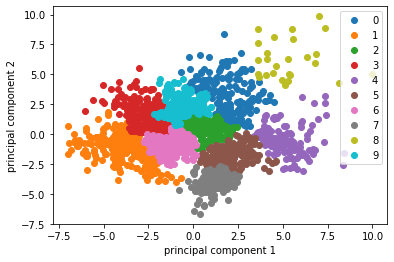

In [3]:
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
cluster.fit_predict(principalData)

df = pd.DataFrame(data=principalData, columns=['x', 'y'])
df.insert(2, 'label', cluster.labels_)

groups = df.groupby('label')
for name, group in groups:
    plt.plot(group['x'], group['y'], marker='o', linestyle='', label=name)

plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.legend()
plt.show()
plt.close()

In [4]:
actualData = digits.target
predData = cluster.labels_

res = len(set(actualData) & set(predData)) / float(len(set(actualData) | set(predData))) * 100
print("Actual vs. Predicted Data Array % Similarity:")
print("{}%".format(res))
print("Confusion Matrix:")
print(confusion_matrix(actualData, predData))
print("Fowlkes-Mallows Score:")
print(fowlkes_mallows_score(actualData, predData))

Actual vs. Predicted Data Array % Similarity:
100.0%
Confusion Matrix:
[[  0   1  16   0   1 123   2  35   0   0]
 [ 54  22  74   0   0   0  16   1   0  15]
 [  4 128   6  16   0   0  21   0   0   2]
 [  4  53   1  76   0   2  32   0   0  15]
 [  5   0   5   2 135  29   0   0   4   1]
 [  9   7  27  67   1   5  36   0   0  30]
 [  0   0   0   0   0  25   0 156   0   0]
 [ 80   0   8   8   0   0   0   0  15  68]
 [  9   6  51  25   0   0  52   0   0  31]
 [ 19  19  15  27   0   0  78   0   7  15]]
Fowlkes-Mallows Score:
0.38253228686622304
